## FIFA 2021 DATA ANALYSIS

In [1]:
# j'importe les librairies nécéssaires
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import is_numeric_dtype
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
#OVA :c Offensive Value
#POT : Potential
#BOV :
#CROSSING
#VOLLEY

Project Source:

https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring

In [3]:
df = pd.read_csv('fifa21 raw data v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

/var/folders/97/kcf9thns5z3_g34_y6xzwgkc0000gn/T/ipykernel_26030/1419749304.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21 raw data v2.csv')


#  DATA CLEANING

1/Vérifier la taille du dataset


In [4]:
print(df.shape)

(18979, 77)


2/Vérifier les types de données


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

3/Vérifier et supprimer les doublons


In [6]:
df.drop_duplicates(inplace=True)

4/Supprimmer les lignes avec trop de valeurs manquantes


In [7]:
column_list = list(df.columns) 
column_list

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [8]:
column_to_drop = []
for column in column_list:
    if df[column].isnull().sum() > int(len(df))/2:
        column_to_drop.append(column)  # je supprime les lignes dont le nombres de valeurs nlles est supérieur à 50% du nombre total de lignes
                                        


In [9]:
column_to_drop # le(s) colonnes(s) à supprimer

['Loan Date End']

In [10]:
df = df.drop('Loan Date End', axis=1)

5/conversion des donnes des colonnes 'Height' et 'Weight' en numérique:


In [11]:
def convert_to_cm(height):
    if "'" in height:  # Vérifie si la taille est en pieds ou en pouces
        feet, inches = height.split("'")
        inches = inches.rstrip('"')
        cm = (int(feet)*12 + int(inches)) * 2.54
    else:  # Height est déja en cm donc on supprime le 'cm'
        taille, junk = height.split('c')
        cm = float(taille)
    return cm


In [12]:
df['Height_cm'] = df['Height'].apply(convert_to_cm) # on applique la fonction au df['Height'] et on crée une nouvelle colonne 'Height_cm'

In [13]:
df[df['Height'].str.contains("'")][['Height_cm','Height']]
#on peut voir que la conversion a été correctement effectuée


,Height_cm,Height
793,187.96,"6'2"""
847,190.50,"6'3"""
848,195.58,"6'5"""
860,180.34,"5'11"""
861,193.04,"6'4"""
862,185.42,"6'1"""
863,182.88,"6'0"""
864,185.42,"6'1"""
865,180.34,"5'11"""
866,187.96,"6'2"""


In [14]:
#on peut maintenant supprimer la colonne 'Height'
df = df.drop('Height', axis=1)

In [15]:
#maintenant passons au 'Weight'...
def formatting_weight(weight):
    if 'kg' in weight:
        weight = weight.replace('kg','')
        weight = float(weight)
    else:
        weight = weight.replace('lbs','')
        weight = int(weight) * 0.45
    return float(weight)

df['Weight_kg'] = df['Weight'].apply(formatting_weight)  

In [16]:
df[df['Weight'].str.contains('kg|lbs', regex=True)][['Weight_kg', 'Weight']]
#on peut aussi voir que la conversion est bonne

,Weight_kg,Weight
0,72.0,72kg
1,83.0,83kg
2,87.0,87kg
3,70.0,70kg
4,68.0,68kg
...,...,...
18974,66.0,66kg
18975,65.0,65kg
18976,74.0,74kg
18977,69.0,69kg


In [17]:
#on peut maintenant supprimer la colonne 'Weight'
df = df.drop('Weight', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 18978
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  object 
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Preferred Foot    18979 non-null  object 
 13  BOV               18979 non-null  int64  
 14  Best Position     18979 non-null  object 
 15  Joined            18979 non-null  object 
 16  Value             18979 non-null  object

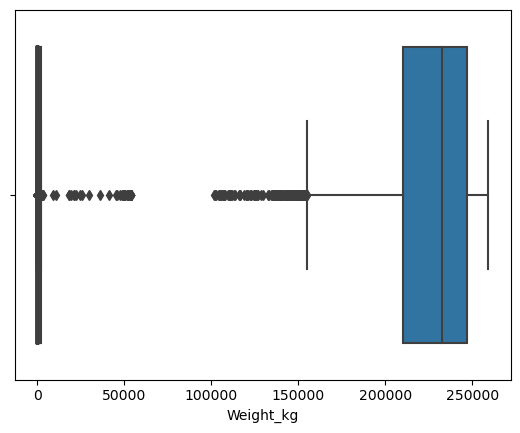

In [19]:
#6/Recherche de valeurs aberrantes
for column in df.columns:
    if is_numeric_dtype(df[column]):
        sns.boxplot(x=df[column])


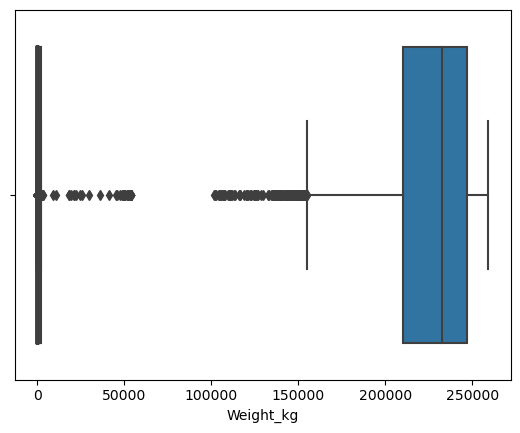

In [20]:
for column in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(x=df[column])

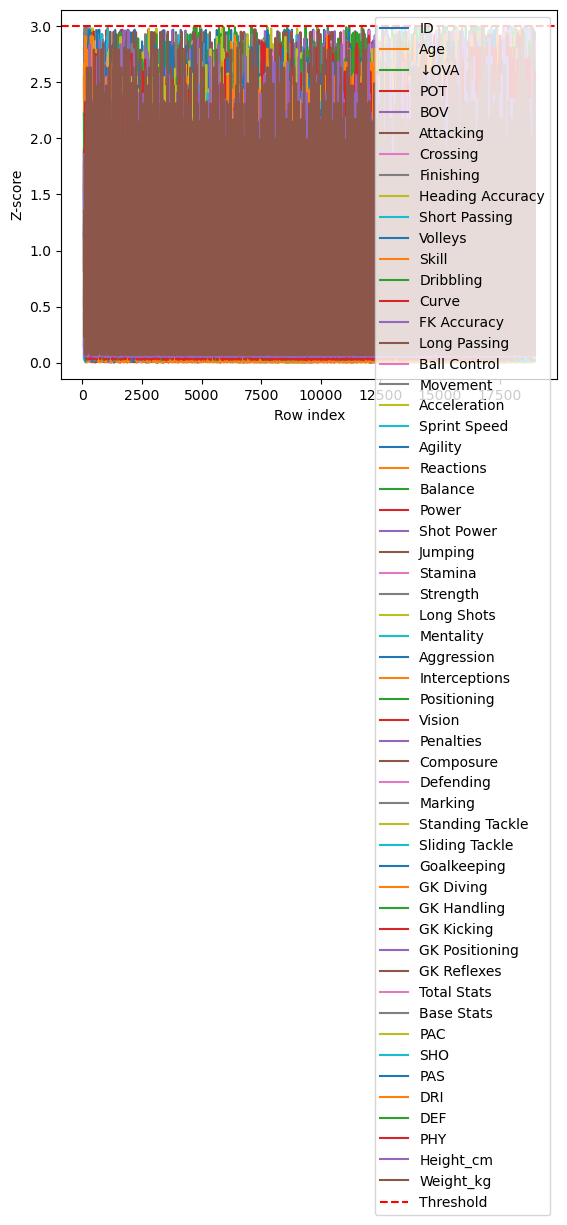

In [21]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for detecting and removing outliers

outlier_indices = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z = np.abs(stats.zscore(df[column]))
        threshold = 3
        outliers = np.where(z > threshold)[0]
        outlier_indices.extend(outliers)

while len(outlier_indices) > 0:
    # Remove rows with outliers
    df = df.drop(df.index[outlier_indices])
    
    # Re-calculate the Z-scores for numeric columns
    outlier_indices = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            z = np.abs(stats.zscore(df[column]))
            outliers = np.where(z > threshold)[0]
            outlier_indices.extend(outliers)
    
    if len(outlier_indices) == 0:
        break

# Plot the process
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z = np.abs(stats.zscore(df[column]))
        plt.plot(z, label=column)

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Row index')
plt.ylabel('Z-score')
plt.legend()
plt.show()


In [22]:
#Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
  # convert the 'Joined' column to datetime format
df['Joined'] = pd.to_datetime(df['Joined'])


In [23]:
   # calculate the age of each person in the new column
now = datetime.now()
df['Contract_duration'] = (now - df['Joined']).astype('<m8[Y]') #astype('<m8[Y]') is a method used to convert a datetime64[ns] column in pandas to a year-based timedelta64[ns] column

In [24]:
df[df['Contract_duration']>10] # and we retrieve the players whose contract is older than 10 years

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration
170,205678,E. Višća,Edin Višća,https://cdn.sofifa.com/players/205/678/21_60.png,http://sofifa.com/player/205678/edin-visca/210...,Bosnia Herzegovina,30,83,83,\n\n\n\nMedipol Başakşehir FK,...,88,77,79,82,47,64,87,172.0,63.0,11.0
191,189575,Muniain,Iker Muniain Goñi,https://cdn.sofifa.com/players/189/575/21_60.png,http://sofifa.com/player/189575/iker-muniain-g...,Spain,27,83,83,\n\n\n\nAthletic Club de Bilbao,...,81,75,80,87,51,60,64,170.0,66.0,13.0
258,202857,K. Bellarabi,Karim Bellarabi,https://cdn.sofifa.com/players/202/857/21_60.png,http://sofifa.com/player/202857/karim-bellarab...,Germany,30,82,82,\n\n\n\nBayer 04 Leverkusen,...,90,76,74,85,34,72,58,184.0,81.0,11.0
261,177457,L. Bender,Lars Bender,https://cdn.sofifa.com/players/177/457/21_60.png,http://sofifa.com/player/177457/lars-bender/21...,Germany,31,82,82,\n\n\n\nBayer 04 Leverkusen,...,60,64,73,72,84,77,43,185.0,78.0,13.0
272,183907,J. Boateng,Jérôme Boateng,https://cdn.sofifa.com/players/183/907/21_60.png,http://sofifa.com/player/183907/jerome-boateng...,Germany,31,82,82,\n\n\n\nFC Bayern München,...,70,50,72,65,82,79,96,192.0,90.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16064,256291,M. Haeder,Matthias Haeder,https://cdn.sofifa.com/players/256/291/21_60.png,http://sofifa.com/player/256291/matthias-haede...,Germany,31,59,59,\n\n\n\nSC Verl,...,61,57,45,61,25,58,1,175.0,75.0,12.0
16428,252807,S. Dikmen,Soner Dikmen,https://cdn.sofifa.com/players/252/807/21_60.png,http://sofifa.com/player/252807/soner-dikmen/2...,Turkey,26,58,60,\n\n\n\nGençlerbirliği SK,...,60,43,57,58,54,57,NaN,179.0,75.0,12.0
16519,248760,J. Popelard,John Popelard,https://cdn.sofifa.com/players/248/760/21_60.png,http://sofifa.com/player/248760/john-popelard/...,France,34,58,58,\n\n\n\nFC Chambly Oise,...,54,45,55,57,49,59,NaN,181.0,76.0,12.0
17032,247196,Luo Yi,Yi Luo,https://cdn.sofifa.com/players/247/196/21_60.png,http://sofifa.com/player/247196/yi-luo/210006/,China PR,33,57,57,\n\n\n\nWuhan Zall,...,65,48,54,56,52,52,NaN,175.0,64.0,11.0


6/'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. 
For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc


In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14304 entries, 62 to 18976
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 14304 non-null  int64         
 1   Name               14304 non-null  object        
 2   LongName           14304 non-null  object        
 3   photoUrl           14304 non-null  object        
 4   playerUrl          14304 non-null  object        
 5   Nationality        14304 non-null  object        
 6   Age                14304 non-null  int64         
 7   ↓OVA               14304 non-null  int64         
 8   POT                14304 non-null  int64         
 9   Club               14304 non-null  object        
 10  Contract           14304 non-null  object        
 11  Positions          14304 non-null  object        
 12  Preferred Foot     14304 non-null  object        
 13  BOV                14304 non-null  int64         
 14  Best 

In [26]:
def value_wage_releaseClause(to_format):
    if 'M' in to_format:
        to_format = to_format.replace('€','')
        to_format = to_format.replace('M','')
        to_format = float(to_format)*1000000.0
        
    elif 'K' in to_format:
        to_format = to_format.replace('€','')
        to_format = to_format.replace('K','')
        to_format = float(to_format)*1000.0
    return to_format    


list = ['Value','Wage','Release Clause']
for elem in list:
    df[elem+'_formatted'] = df[elem].apply(value_wage_releaseClause)



In [27]:
df[['Value_formatted','Release Clause_formatted','Wage_formatted']] # the new formatted column

,Value_formatted,Release Clause_formatted,Wage_formatted
62,66500000.0,84700000.0,145000.0
70,70000000.0,81900000.0,100000.0
76,58000000.0,78000000.0,120000.0
79,63000000.0,86600000.0,135000.0
82,37000000.0,54200000.0,130000.0
...,...,...,...
18961,120000.0,152000.0,2000.0
18963,150000.0,165000.0,€500
18973,130000.0,165000.0,€500
18975,130000.0,165000.0,€500


In [28]:
#we just have to drop the old columns
df = df.drop(['Wage','Value','Release Clause'], axis=1)

Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical

In [29]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'Height_cm', 'Weight_kg',
       'Contract_duration', 'Value_for

In [30]:
# pd.set_option('display.max_columns', None) # displaying all the columns of the dataframe
# pd.set_option('display.max_rows', None) # displaying all the row

In [31]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted
62,231866,Rodri,Rodrigo Hernández Cascante,https://cdn.sofifa.com/players/231/866/21_60.png,http://sofifa.com/player/231866/rodrigo-hernan...,Spain,24,85,88,\n\n\n\nManchester City,...,77,82,79,161,191.0,82.0,3.0,66500000.0,145000.0,84700000.0
70,206113,S. Gnabry,Serge Gnabry,https://cdn.sofifa.com/players/206/113/21_60.png,http://sofifa.com/player/206113/serge-gnabry/2...,Germany,24,85,87,\n\n\n\nFC Bayern München,...,86,43,70,299,175.0,75.0,5.0,70000000.0,100000.0,81900000.0
76,210243,Ricardo Pereira,Ricardo Barbosa Pereira,https://cdn.sofifa.com/players/210/243/21_60.png,http://sofifa.com/player/210243/ricardo-barbos...,Portugal,26,85,86,\n\n\n\nLeicester City,...,82,81,76,203,175.0,70.0,5.0,58000000.0,120000.0,78000000.0
79,201399,M. Icardi,Mauro Icardi,https://cdn.sofifa.com/players/201/399/21_60.png,http://sofifa.com/player/201399/mauro-icardi/2...,Argentina,27,85,86,\n\n\n\nParis Saint-Germain,...,78,36,68,159,181.0,75.0,3.0,63000000.0,135000.0,86600000.0
82,184087,T. Alderweireld,Toby Alderweireld,https://cdn.sofifa.com/players/184/087/21_60.png,http://sofifa.com/player/184087/toby-alderweir...,Belgium,31,85,85,\n\n\n\nTottenham Hotspur,...,67,87,79,63,186.0,81.0,7.0,37000000.0,130000.0,54200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,241274,L. Waldock,Liam Waldock,https://cdn.sofifa.com/players/241/274/21_60.png,http://sofifa.com/player/241274/liam-waldock/2...,England,19,48,65,\n\n\n\nSheffield Wednesday,...,51,43,48,NaN,178.0,64.0,5.0,120000.0,2000.0,152000.0
18963,258671,L. Ravenhill,Liam Ravenhill,https://cdn.sofifa.com/players/258/671/21_60.png,http://sofifa.com/player/258671/liam-ravenhill...,England,17,48,69,\n\n\n\nDoncaster Rovers,...,50,41,56,NaN,174.0,71.0,2.0,150000.0,€500,165000.0
18973,258736,V. Da Silva,Vani Da Silva,https://cdn.sofifa.com/players/258/736/21_60.png,http://sofifa.com/player/258736/vani-da-silva/...,England,17,47,67,\n\n\n\nOldham Athletic,...,53,16,40,NaN,171.0,58.0,2.0,130000.0,€500,165000.0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,49,35,45,NaN,175.0,65.0,2.0,130000.0,€500,165000.0


In [32]:

# Iterate over the columns and check for stars
stars = []
for col in df.columns:
    if '★' in df[col].values:
        # append the columns in the empty list
        stars.append(col)


/var/folders/97/kcf9thns5z3_g34_y6xzwgkc0000gn/T/ipykernel_26030/898775851.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '★' in df[col].values:


In [33]:
stars


[]

In [34]:
df['Mentality']

62       362
70       337
76       373
79       324
82       338
        ... 
18961    232
18963    233
18973    186
18975    193
18976    230
Name: Mentality, Length: 14304, dtype: int64

Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14304 entries, 62 to 18976
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        14304 non-null  int64         
 1   Name                      14304 non-null  object        
 2   LongName                  14304 non-null  object        
 3   photoUrl                  14304 non-null  object        
 4   playerUrl                 14304 non-null  object        
 5   Nationality               14304 non-null  object        
 6   Age                       14304 non-null  int64         
 7   ↓OVA                      14304 non-null  int64         
 8   POT                       14304 non-null  int64         
 9   Club                      14304 non-null  object        
 10  Contract                  14304 non-null  object        
 11  Positions                 14304 non-null  object        
 12  Preferred Foot   

In [36]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'Height_cm', 'Weight_kg',
       'Contract_duration', 'Value_for

7/le but ici est de rétirer les étoite et garder unique le premier caractère

In [37]:
df['W/F']

62       4 ★
70       4 ★
76       4 ★
79       4 ★
82       3 ★
        ... 
18961    3 ★
18963    2 ★
18973    2 ★
18975    2 ★
18976    2 ★
Name: W/F, Length: 14304, dtype: object

In [38]:
liste_taille = []
for elem in df['W/F']:
    liste_taille.append(len(elem))

In [39]:
w_f_bonformat = [int(x[0]) for x in df['W/F']] # on récupère le premier élément de chaque ligne de la colonne 'W/F' directement en int

In [40]:
df['w_f_bonformat'] = w_f_bonformat # on ajoute les valeurs dans une nouvelle colonne 'w_f_bonformat'

In [41]:
df[['w_f_bonformat','W/F']] # la conversion a bien été effectuée

,w_f_bonformat,W/F
62,4,4 ★
70,4,4 ★
76,4,4 ★
79,4,4 ★
82,3,3 ★
...,...,...
18961,3,3 ★
18963,2,2 ★
18973,2,2 ★
18975,2,2 ★


In [42]:
df = df.drop('W/F', axis=1) # on supprime la colonne 'W/F' qui n'a plus d'utilité

In [43]:
df['Club']

62           \n\n\n\nManchester City
70         \n\n\n\nFC Bayern München
76            \n\n\n\nLeicester City
79       \n\n\n\nParis Saint-Germain
82         \n\n\n\nTottenham Hotspur
                    ...             
18961    \n\n\n\nSheffield Wednesday
18963       \n\n\n\nDoncaster Rovers
18973        \n\n\n\nOldham Athletic
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
Name: Club, Length: 14304, dtype: object

In [44]:
df['Club_format'] = df['Club'].str.split('\n').str[-1]


In [45]:
df['Club_format']

62           Manchester City
70         FC Bayern München
76            Leicester City
79       Paris Saint-Germain
82         Tottenham Hotspur
                ...         
18961    Sheffield Wednesday
18963       Doncaster Rovers
18973        Oldham Athletic
18975        Oldham Athletic
18976             Derry City
Name: Club_format, Length: 14304, dtype: object

In [46]:
df = df.drop('Club', axis=1) # on supprime la colonne 'Club' qui n'a plus d'utilité

In [47]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14304 entries, 62 to 18976
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        14304 non-null  int64         
 1   Name                      14304 non-null  object        
 2   LongName                  14304 non-null  object        
 3   photoUrl                  14304 non-null  object        
 4   playerUrl                 14304 non-null  object        
 5   Nationality               14304 non-null  object        
 6   Age                       14304 non-null  int64         
 7   ↓OVA                      14304 non-null  int64         
 8   POT                       14304 non-null  int64         
 9   Contract                  14304 non-null  object        
 10  Positions                 14304 non-null  object        
 11  Preferred Foot            14304 non-null  object        
 12  BOV              

In [48]:
df['Contract']

62       2019 ~ 2024
70       2017 ~ 2023
76       2018 ~ 2023
79       2020 ~ 2024
82       2015 ~ 2023
            ...     
18961    2017 ~ 2021
18963    2020 ~ 2024
18973    2020 ~ 2021
18975    2020 ~ 2021
18976    2019 ~ 2020
Name: Contract, Length: 14304, dtype: object

In [49]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Contract', 'Positions', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Hits', 'Height_cm', 'Weight_kg', 'Contract_duration',
       'Value_formatted', 'Wage_

In [50]:
df['Preferred Foot'].unique() # value to get_dummies

array(['Right', 'Left'], dtype=object)

In [51]:
df['Best Position']

62       CDM
70        RM
76        RB
79        ST
82        CB
        ... 
18961    CAM
18963    CAM
18973    CAM
18975    CAM
18976    CAM
Name: Best Position, Length: 14304, dtype: object

In [52]:
for column in df.columns:
    print(f"Column: {column}, Data Type: {df[column].dtype}")
    print("First 5 rows:")
    print(df[column].head(5))
    print("Last 5 rows:")
    print(df[column].tail(5))
    print("--------------------------------------")

Column: ID, Data Type: int64
First 5 rows:
62    231866
70    206113
76    210243
79    201399
82    184087
Name: ID, dtype: int64
Last 5 rows:
18961    241274
18963    258671
18973    258736
18975    258760
18976    252757
Name: ID, dtype: int64
--------------------------------------
Column: Name, Data Type: object
First 5 rows:
62              Rodri
70          S. Gnabry
76    Ricardo Pereira
79          M. Icardi
82    T. Alderweireld
Name: Name, dtype: object
Last 5 rows:
18961      L. Waldock
18963    L. Ravenhill
18973     V. Da Silva
18975        B. Hough
18976     R. McKinley
Name: Name, dtype: object
--------------------------------------
Column: LongName, Data Type: object
First 5 rows:
62    Rodrigo Hernández Cascante
70                  Serge Gnabry
76       Ricardo Barbosa Pereira
79                  Mauro Icardi
82             Toby Alderweireld
Name: LongName, dtype: object
Last 5 rows:
18961      Liam Waldock
18963    Liam Ravenhill
18973     Vani Da Silva
18975         

In [53]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Contract,...,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted,w_f_bonformat,Club_format
62,231866,Rodri,Rodrigo Hernández Cascante,https://cdn.sofifa.com/players/231/866/21_60.png,http://sofifa.com/player/231866/rodrigo-hernan...,Spain,24,85,88,2019 ~ 2024,...,79,161,191.0,82.0,3.0,66500000.0,145000.0,84700000.0,4,Manchester City
70,206113,S. Gnabry,Serge Gnabry,https://cdn.sofifa.com/players/206/113/21_60.png,http://sofifa.com/player/206113/serge-gnabry/2...,Germany,24,85,87,2017 ~ 2023,...,70,299,175.0,75.0,5.0,70000000.0,100000.0,81900000.0,4,FC Bayern München
76,210243,Ricardo Pereira,Ricardo Barbosa Pereira,https://cdn.sofifa.com/players/210/243/21_60.png,http://sofifa.com/player/210243/ricardo-barbos...,Portugal,26,85,86,2018 ~ 2023,...,76,203,175.0,70.0,5.0,58000000.0,120000.0,78000000.0,4,Leicester City
79,201399,M. Icardi,Mauro Icardi,https://cdn.sofifa.com/players/201/399/21_60.png,http://sofifa.com/player/201399/mauro-icardi/2...,Argentina,27,85,86,2020 ~ 2024,...,68,159,181.0,75.0,3.0,63000000.0,135000.0,86600000.0,4,Paris Saint-Germain
82,184087,T. Alderweireld,Toby Alderweireld,https://cdn.sofifa.com/players/184/087/21_60.png,http://sofifa.com/player/184087/toby-alderweir...,Belgium,31,85,85,2015 ~ 2023,...,79,63,186.0,81.0,7.0,37000000.0,130000.0,54200000.0,3,Tottenham Hotspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,241274,L. Waldock,Liam Waldock,https://cdn.sofifa.com/players/241/274/21_60.png,http://sofifa.com/player/241274/liam-waldock/2...,England,19,48,65,2017 ~ 2021,...,48,NaN,178.0,64.0,5.0,120000.0,2000.0,152000.0,3,Sheffield Wednesday
18963,258671,L. Ravenhill,Liam Ravenhill,https://cdn.sofifa.com/players/258/671/21_60.png,http://sofifa.com/player/258671/liam-ravenhill...,England,17,48,69,2020 ~ 2024,...,56,NaN,174.0,71.0,2.0,150000.0,€500,165000.0,2,Doncaster Rovers
18973,258736,V. Da Silva,Vani Da Silva,https://cdn.sofifa.com/players/258/736/21_60.png,http://sofifa.com/player/258736/vani-da-silva/...,England,17,47,67,2020 ~ 2021,...,40,NaN,171.0,58.0,2.0,130000.0,€500,165000.0,2,Oldham Athletic
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,2020 ~ 2021,...,45,NaN,175.0,65.0,2.0,130000.0,€500,165000.0,2,Oldham Athletic


In [54]:
pd.set_option('display.max_columns', None) # displaying all the columns of the dataframe

In [55]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Contract,Positions,Preferred Foot,BOV,Best Position,Joined,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted,w_f_bonformat,Club_format
62,231866,Rodri,Rodrigo Hernández Cascante,https://cdn.sofifa.com/players/231/866/21_60.png,http://sofifa.com/player/231866/rodrigo-hernan...,Spain,24,85,88,2019 ~ 2024,"CDM, CM",Right,85,CDM,2019-07-04,346,63,64,75,85,59,359,76,65,54,82,82,350,66,65,68,82,69,382,74,69,84,79,76,362,76,83,75,82,46,85,245,83,84,78,49,10,10,7,14,8,2093,448,3★,Medium,High,2 ★,65,68,77,77,82,79,161,191.0,82.0,3.0,66500000.0,145000.0,84700000.0,4,Manchester City
70,206113,S. Gnabry,Serge Gnabry,https://cdn.sofifa.com/players/206/113/21_60.png,http://sofifa.com/player/206113/serge-gnabry/2...,Germany,24,85,87,2017 ~ 2023,"RM, LM, RW",Right,85,RM,2017-07-01,368,79,85,42,79,83,380,87,74,62,74,83,425,90,76,86,85,88,379,86,65,78,69,81,337,63,38,85,83,68,80,132,45,44,43,50,14,10,10,9,7,2071,442,4★,High,Medium,3 ★,82,83,78,86,43,70,299,175.0,75.0,5.0,70000000.0,100000.0,81900000.0,4,FC Bayern München
76,210243,Ricardo Pereira,Ricardo Barbosa Pereira,https://cdn.sofifa.com/players/210/243/21_60.png,http://sofifa.com/player/210243/ricardo-barbos...,Portugal,26,85,86,2018 ~ 2023,RB,Right,85,RB,2018-06-09,352,82,63,65,83,59,372,82,78,52,78,82,410,84,83,79,85,79,370,74,75,88,69,64,373,79,81,75,77,61,81,249,82,84,83,65,16,12,15,11,11,2191,467,3★,High,High,3 ★,83,66,79,82,81,76,203,175.0,70.0,5.0,58000000.0,120000.0,78000000.0,4,Leicester City
79,201399,M. Icardi,Mauro Icardi,https://cdn.sofifa.com/players/201/399/21_60.png,http://sofifa.com/player/201399/mauro-icardi/2...,Argentina,27,85,86,2020 ~ 2024,ST,Right,85,ST,2020-06-08,386,47,90,88,76,85,336,76,76,48,54,82,381,74,73,73,86,75,387,85,93,66,72,71,324,56,22,92,72,82,83,89,45,24,20,43,13,9,5,7,9,1946,405,3★,Medium,Medium,3 ★,73,85,65,78,36,68,159,181.0,75.0,3.0,63000000.0,135000.0,86600000.0,4,Paris Saint-Germain
82,184087,T. Alderweireld,Toby Alderweireld,https://cdn.sofifa.com/players/184/087/21_60.png,http://sofifa.com/player/184087/toby-alderweir...,Belgium,31,85,85,2015 ~ 2023,CB,Right,85,CB,2015-07-08,308,64,45,82,79,38,351,62,63,69,82,75,331,60,65,59,85,62,375,78,82,78,79,58,338,81,85,52,62,58,86,262,88,89,85,66,16,6,14,16,14,2031,423,2★,Medium,Medium,3 ★,63,55,72,67,87,79,63,186.0,81.0,7.0,37000000.0,130000.0,54200000.0,3,Tottenham Hotspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,241274,L. Waldock,Liam Waldock,https://cdn.sofifa.com/players/241/274/21_60.png,http://sofifa.com/player/241274/liam-waldock/2...,England,19,48,65,2017 ~ 2021,CM,Right,50,CAM,2017-09-25,204,39,31,44,58,32,229,49,40,42,52,46,315,59,62,67,53,74,226,45,62,51,40,28,232,59,45,33,50,45,44,123,42,42,39,43,12,7,7,9,8,1372,287,2★,Medium,Medium,1 ★,61,34,50,51,43,48,NaN,178.0,64.0,5.0,120000.0,2000.0,152000.0,3,Sheffield Wednesday
18963,258671,L. Ravenhill,Liam Ravenhill,https://cdn.sofifa.com/players/258/671/21_60.png,http://sofifa.com/player/258671/liam-ravenhill...,England,17,48,69,2020 ~ 2024,CM,Right,51,CAM,2020-09-08,195,32,33,44,52,34,220,47,38,36,48,51,291,67,60,59,49,56,258,48,64,58,53,35,233,57,38,48,46,44,43,130,39,43,48,4

In [66]:
# suppression des colonnes inutiles
df2 = df.drop(['ID','Name','LongName','photoUrl','playerUrl','Nationality','Contract','Positions','Best Position','Joined','SM','IR','Club_format','D/W','A/W'], axis=1)

In [67]:
df2

,Age,↓OVA,POT,Preferred Foot,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted,w_f_bonformat
62,24,85,88,Right,85,346,63,64,75,85,59,359,76,65,54,82,82,350,66,65,68,82,69,382,74,69,84,79,76,362,76,83,75,82,46,85,245,83,84,78,49,10,10,7,14,8,2093,448,65,68,77,77,82,79,161,191.0,82.0,3.0,66500000.0,145000.0,84700000.0,4
70,24,85,87,Right,85,368,79,85,42,79,83,380,87,74,62,74,83,425,90,76,86,85,88,379,86,65,78,69,81,337,63,38,85,83,68,80,132,45,44,43,50,14,10,10,9,7,2071,442,82,83,78,86,43,70,299,175.0,75.0,5.0,70000000.0,100000.0,81900000.0,4
76,26,85,86,Right,85,352,82,63,65,83,59,372,82,78,52,78,82,410,84,83,79,85,79,370,74,75,88,69,64,373,79,81,75,77,61,81,249,82,84,83,65,16,12,15,11,11,2191,467,83,66,79,82,81,76,203,175.0,70.0,5.0,58000000.0,120000.0,78000000.0,4
79,27,85,86,Right,85,386,47,90,88,76,85,336,76,76,48,54,82,381,74,73,73,86,75,387,85,93,66,72,71,324,56,22,92,72,82,83,89,45,24,20,43,13,9,5,7,9,1946,405,73,85,65,78,36,68,159,181.0,75.0,3.0,63000000.0,135000.0,86600000.0,4
82,31,85,85,Right,85,308,64,45,82,79,38,351,62,63,69,82,75,331,60,65,59,85,62,375,78,82,78,79,58,338,81,85,52,62,58,86,262,88,89,85,66,16,6,14,16,14,2031,423,63,55,72,67,87,79,63,186.0,81.0,7.0,37000000.0,130000.0,54200000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,19,48,65,Right,50,204,39,31,44,58,32,229,49,40,42,52,46,315,59,62,67,53,74,226,45,62,51,40,28,232,59,45,33,50,45,44,123,42,42,39,43,12,7,7,9,8,1372,287,61,34,50,51,43,48,NaN,178.0,64.0,5.0,120000.0,2000.0,152000.0,3
18963,17,48,69,Right,51,195,32,33,44,52,34,220,47,38,36,48,51,291,67,60,59,49,56,258,48,64,58,53,35,233,57,38,48,46,44,43,130,39,43,48,45,6,7,9,8,15,1372,293,63,38,45,50,41,56,NaN,174.0,71.0,2.0,150000.0,€500,165000.0,2
18973,17,47,67,Right,51,202,27,47,36,45,47,208,53,43,31,37,44,339,69,70,67,53,80,231,50,50,55,35,41,186,33,11,43,49,50,45,42,18,11,13,48,11,13,9,9,6,1256,265,70,46,40,53,16,40,NaN,171.0,58.0,2.0,130000.0,€500,165000.0,2
18975,17,47,67,Right,51,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,64,40,48,49,35,45,NaN,175.0,65.0,2.0,130000.0,€500,165000.0,2


In [61]:
len(df['Club_format'].unique())

682

In [68]:
df3 = pd.get_dummies(df2,columns = ["Preferred Foot"],drop_first=True)
df3


,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted,w_f_bonformat,Preferred Foot_Right
62,24,85,88,85,346,63,64,75,85,59,359,76,65,54,82,82,350,66,65,68,82,69,382,74,69,84,79,76,362,76,83,75,82,46,85,245,83,84,78,49,10,10,7,14,8,2093,448,65,68,77,77,82,79,161,191.0,82.0,3.0,66500000.0,145000.0,84700000.0,4,1
70,24,85,87,85,368,79,85,42,79,83,380,87,74,62,74,83,425,90,76,86,85,88,379,86,65,78,69,81,337,63,38,85,83,68,80,132,45,44,43,50,14,10,10,9,7,2071,442,82,83,78,86,43,70,299,175.0,75.0,5.0,70000000.0,100000.0,81900000.0,4,1
76,26,85,86,85,352,82,63,65,83,59,372,82,78,52,78,82,410,84,83,79,85,79,370,74,75,88,69,64,373,79,81,75,77,61,81,249,82,84,83,65,16,12,15,11,11,2191,467,83,66,79,82,81,76,203,175.0,70.0,5.0,58000000.0,120000.0,78000000.0,4,1
79,27,85,86,85,386,47,90,88,76,85,336,76,76,48,54,82,381,74,73,73,86,75,387,85,93,66,72,71,324,56,22,92,72,82,83,89,45,24,20,43,13,9,5,7,9,1946,405,73,85,65,78,36,68,159,181.0,75.0,3.0,63000000.0,135000.0,86600000.0,4,1
82,31,85,85,85,308,64,45,82,79,38,351,62,63,69,82,75,331,60,65,59,85,62,375,78,82,78,79,58,338,81,85,52,62,58,86,262,88,89,85,66,16,6,14,16,14,2031,423,63,55,72,67,87,79,63,186.0,81.0,7.0,37000000.0,130000.0,54200000.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,19,48,65,50,204,39,31,44,58,32,229,49,40,42,52,46,315,59,62,67,53,74,226,45,62,51,40,28,232,59,45,33,50,45,44,123,42,42,39,43,12,7,7,9,8,1372,287,61,34,50,51,43,48,NaN,178.0,64.0,5.0,120000.0,2000.0,152000.0,3,1
18963,17,48,69,51,195,32,33,44,52,34,220,47,38,36,48,51,291,67,60,59,49,56,258,48,64,58,53,35,233,57,38,48,46,44,43,130,39,43,48,45,6,7,9,8,15,1372,293,63,38,45,50,41,56,NaN,174.0,71.0,2.0,150000.0,€500,165000.0,2,1
18973,17,47,67,51,202,27,47,36,45,47,208,53,43,31,37,44,339,69,70,67,53,80,231,50,50,55,35,41,186,33,11,43,49,50,45,42,18,11,13,48,11,13,9,9,6,1256,265,70,46,40,53,16,40,NaN,171.0,58.0,2.0,130000.0,€500,165000.0,2,1
18975,17,47,67,51,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,64,40,48,49,35,45,NaN,175.0,65.0,2.0,130000.0,€500,165000.0,2,1


In [71]:
# deuxième vague de suppression de colonnes inutiles
column_to_drop = ['Attacking','Skill','Movement','Power','Mentality','Defending','Total Stats','Base Stats','Hits','Contract_duration']
df4 = df3.drop(column_to_drop, axis=1)

In [72]:
df4

,Age,↓OVA,POT,BOV,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,PAC,SHO,PAS,DRI,DEF,PHY,Height_cm,Weight_kg,Value_formatted,Wage_formatted,Release Clause_formatted,w_f_bonformat,Preferred Foot_Right
62,24,85,88,85,63,64,75,85,59,76,65,54,82,82,66,65,68,82,69,74,69,84,79,76,76,83,75,82,46,85,83,84,78,49,10,10,7,14,8,65,68,77,77,82,79,191.0,82.0,66500000.0,145000.0,84700000.0,4,1
70,24,85,87,85,79,85,42,79,83,87,74,62,74,83,90,76,86,85,88,86,65,78,69,81,63,38,85,83,68,80,45,44,43,50,14,10,10,9,7,82,83,78,86,43,70,175.0,75.0,70000000.0,100000.0,81900000.0,4,1
76,26,85,86,85,82,63,65,83,59,82,78,52,78,82,84,83,79,85,79,74,75,88,69,64,79,81,75,77,61,81,82,84,83,65,16,12,15,11,11,83,66,79,82,81,76,175.0,70.0,58000000.0,120000.0,78000000.0,4,1
79,27,85,86,85,47,90,88,76,85,76,76,48,54,82,74,73,73,86,75,85,93,66,72,71,56,22,92,72,82,83,45,24,20,43,13,9,5,7,9,73,85,65,78,36,68,181.0,75.0,63000000.0,135000.0,86600000.0,4,1
82,31,85,85,85,64,45,82,79,38,62,63,69,82,75,60,65,59,85,62,78,82,78,79,58,81,85,52,62,58,86,88,89,85,66,16,6,14,16,14,63,55,72,67,87,79,186.0,81.0,37000000.0,130000.0,54200000.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,19,48,65,50,39,31,44,58,32,49,40,42,52,46,59,62,67,53,74,45,62,51,40,28,59,45,33,50,45,44,42,42,39,43,12,7,7,9,8,61,34,50,51,43,48,178.0,64.0,120000.0,2000.0,152000.0,3,1
18963,17,48,69,51,32,33,44,52,34,47,38,36,48,51,67,60,59,49,56,48,64,58,53,35,57,38,48,46,44,43,39,43,48,45,6,7,9,8,15,63,38,45,50,41,56,174.0,71.0,150000.0,€500,165000.0,2,1
18973,17,47,67,51,27,47,36,45,47,53,43,31,37,44,69,70,67,53,80,50,50,55,35,41,33,11,43,49,50,45,18,11,13,48,11,13,9,9,6,70,46,40,53,16,40,171.0,58.0,130000.0,€500,165000.0,2,1
18975,17,47,67,51,38,42,40,56,35,46,40,35,50,48,63,64,61,51,66,48,58,43,47,30,40,23,47,47,36,38,32,44,40,45,12,10,9,6,8,64,40,48,49,35,45,175.0,65.0,130000.0,€500,165000.0,2,1


In [75]:
dtype = []
for column in df4.columns:
    dtype.append(df4[column].dtype)


In [77]:
dtype.

AttributeError: 'list' object has no attribute 'unique'